In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [2]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM: Per capita crime rate by town<br/>
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft<br/>
INDUS: Proportion of non-retail business acres per town<br/>
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br/>
NOX: Nitric oxide concentration (parts per 10 million)<br/>
RM: Average number of rooms per dwelling<br/>
AGE: Proportion of owner-occupied units built prior to 1940<br/>
DIS: Weighted distances to five Boston employment centers<br/>
RAD: Index of accessibility to radial highways<br/>
TAX: Full-value property tax rate per 10,000 dollar<br/>
PTRATIO: Pupil-teacher ratio by town<br/>
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town<br/>
LSTAT: Percentage of lower status of the population<br/>
MEDV: Median value of owner-occupied homes in $1000s<br/>

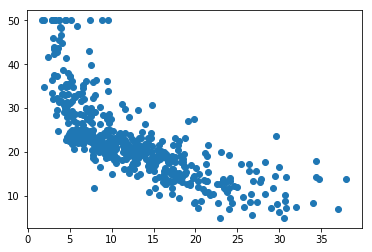

In [3]:
X, y = df.LSTAT, boston.target
plt.scatter(X, y)

In [27]:
X = df[['LSTAT']]
y = df[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = LinearRegression()
regr.fit(X_train, y_train)   # the training data and training label
y_pred = regr.predict(X_test)   # make predictions using the testing set

# Regression metrics
print('Coefficients: \n', regr.coef_)
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [[-0.9665309]]
Mean squared error: 33.52
Root Mean squared error: 5.79
Variance score: 0.54


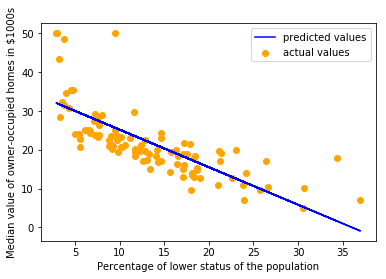

In [28]:
plt.scatter(X_test, y_test, color='orange', label='actual values')   # testing data and testing label
plt.plot(X_test, y_pred, color='blue', label='predicted values')   # training label and predicted values

plt.xlabel('Percentage of lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000s')

plt.legend()

In [39]:
poly_f = PolynomialFeatures(degree=3)
X_train_poly = poly_f.fit_transform(X_train)
print(X_train_poly)   # new X
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

[[1.00000000e+00 2.49100000e+01 6.20508100e+02 1.54568568e+04]
 [1.00000000e+00 8.47000000e+00 7.17409000e+01 6.07645423e+02]
 [1.00000000e+00 7.83000000e+00 6.13089000e+01 4.80048687e+02]
 ...
 [1.00000000e+00 5.99000000e+00 3.58801000e+01 2.14921799e+02]
 [1.00000000e+00 2.32700000e+01 5.41492900e+02 1.26005398e+04]
 [1.00000000e+00 1.06300000e+01 1.12996900e+02 1.20115705e+03]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
X.shape, X_train_poly.shape

((506, 1), (404, 4))

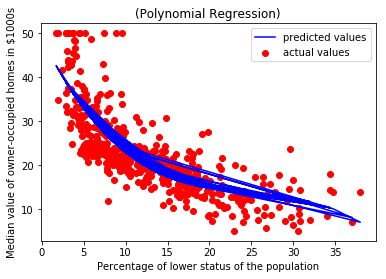

In [41]:
plt.scatter(X, y, color = 'red', label='actual values')
plt.plot(X, poly_reg.predict(poly_f.transform(X)), color = 'blue', label='predicted values')

plt.title('(Polynomial Regression)')
plt.xlabel('Percentage of lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.legend()

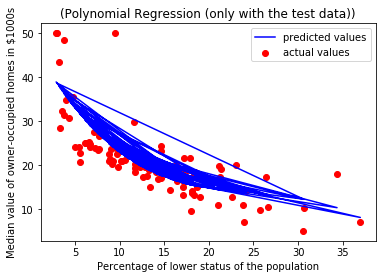

In [45]:
plt.scatter(X_test, y_test, color = 'red', label='actual values')
plt.plot(X_test, poly_reg.predict(poly_f.transform(X_test)), color = 'blue', label='predicted values')

plt.title('(Polynomial Regression (only with the test data))')
plt.xlabel('Percentage of lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.legend()

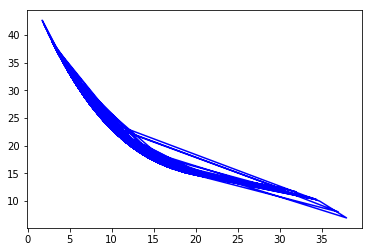

In [43]:
# only the Polynomial Regression line
plt.plot(X, poly_reg.predict(poly_f.transform(X)), color = 'blue')